# TP2 : Mesure du coefficient de rebond d’une balle
### Auteur : ARGUELLO Camilo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
# import data
data = pd.read_csv('./Acoustic Stopwatch_2023-03-07_15-24-18/All.csv', sep=',')
# show head
data.head()

,Event time (s),Interval (s)
0,2.133771,0.785792
1,2.919563,0.668104
2,3.587667,0.578625
3,4.166292,0.509146
4,4.675438,0.454750


In [19]:
## Pour la première colonne, on calcule la différence de temps entre deux événements

# on calcule la différence de temps entre deux événements
data['diff'] = data['Event time (s)'].diff()
# on supprime la première ligne qui est NaN
data = data.dropna()
# on affiche les 5 premières lignes
data.head()

,Event time (s),Interval (s),diff
1,2.919563,0.668104,0.785792
2,3.587667,0.578625,0.668104
3,4.166292,0.509146,0.578625
4,4.675438,0.454750,0.509146
5,5.130187,0.411521,0.454750


In [34]:
# on verifie que la diff est égale à la colonne Interval (s) 
# Il faut comparer les lignes de cette façon:
# ligne 2: data['diff'] avec ligne 1: data['Interval (s)']
# ligne 3: data['diff'] avec ligne 2: data['Interval (s)']
# ligne 4: data['diff'] avec ligne 3: data['Interval (s)']
# etc.

def interval_diff_compare(data):
    for i in range(1, len(data)):
        if round(data['diff'][i+1], 2) != round(data['Interval (s)'][i], 2):
            return False
    return True

# on verifie que la diff est égale à la colonne Interval (s)
print("La difference de temps est égale à l'intervalle: ", interval_diff_compare(data))


La difference de temps est égale à l'intervalle:  True


In [35]:
## Calcul de la vitesse entre chaque rebond grâce à la formule T_i = 2 * v_i / g
data['vitesse'] = 2 * data['diff'] * 9.81
# on affiche les 5 premières lignes
data.head()

,Event time (s),Interval (s),diff,vitesse
1,2.919563,0.668104,0.785792,15.417233
2,3.587667,0.578625,0.668104,13.108204
3,4.166292,0.509146,0.578625,11.352623
4,4.675438,0.454750,0.509146,9.989441
5,5.130187,0.411521,0.454750,8.922195


In [37]:
# On calcule le numéro du rebond
data['rebond'] = np.arange(1, len(data)+1)

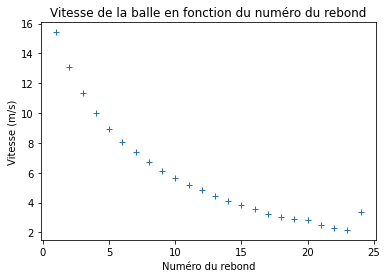

In [41]:
# On trace la vitesse de la balle en fonction du numéro du rebond
plt.plot(data['rebond'], data['vitesse'], '+')
plt.title('Vitesse de la balle en fonction du numéro du rebond')
plt.xlabel('Numéro du rebond')
plt.ylabel('Vitesse (m/s)')
plt.show()

<ErrorbarContainer object of 3 artists>

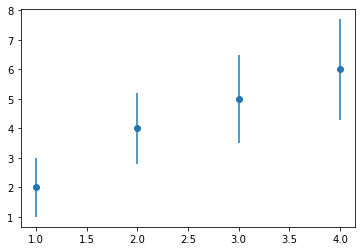

In [40]:
## Exemple

x = [1, 2, 3, 4]
y = [2, 4, 5, 6]
yerr = [1,1.2,1.5,1.7]
plt.errorbar(x, y, yerr=yerr, fmt='o')